## Understanding the Data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import autocorrelation_plot

In [5]:
df = pd.read_csv("../Dataset/component_x.csv")

In [6]:
print("Preview of the dataset:")
display(df.head())

Preview of the dataset:


,date,inventory,demand
0,2022-01-01,231,127
1,2022-01-02,116,81
2,2022-01-03,154,5
3,2022-01-04,85,58
4,2022-01-05,238,147


In [7]:
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (731, 3)


In [8]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
date         object
inventory     int64
demand        int64
dtype: object


In [9]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
date         0
inventory    0
demand       0
dtype: int64


In [10]:
# Step 7: View basic statistics
print("\nBasic statistical summary:")
display(df.describe())


Basic statistical summary:


,inventory,demand
count,731.000000,731.000000
mean,272.824897,137.306430
std,131.962498,108.187859
min,50.000000,0.000000
25%,160.500000,47.000000
50%,270.000000,109.000000
75%,388.000000,202.000000
max,500.000000,461.000000


### Changing data Type of Date column

In [12]:
df['date'] = pd.to_datetime(df['date'])

In [13]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
date         datetime64[ns]
inventory             int64
demand                int64
dtype: object


## Visualizing Pattern

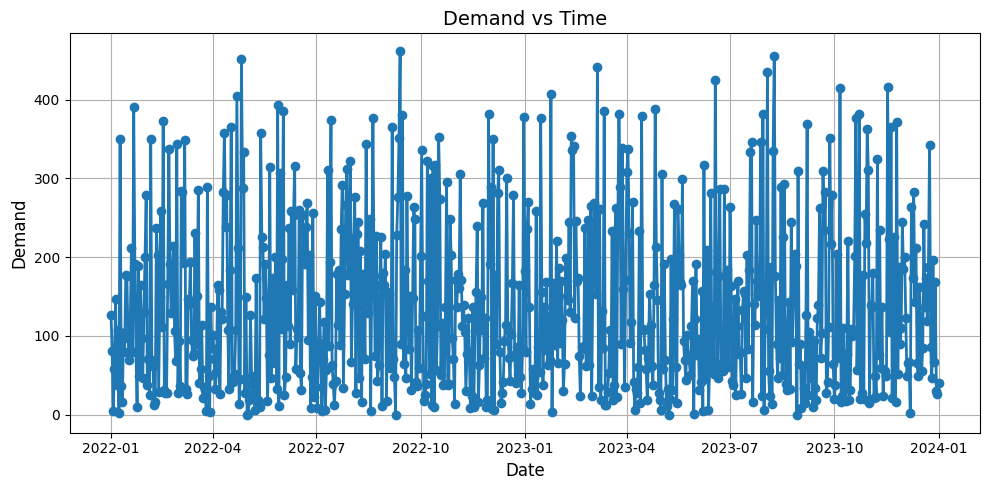

In [17]:
# Plot Demand over Time
plt.figure(figsize=(10,5))
plt.plot(df['date'], df['demand'], marker='o', linestyle='-', linewidth=2)

plt.title('Demand vs Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


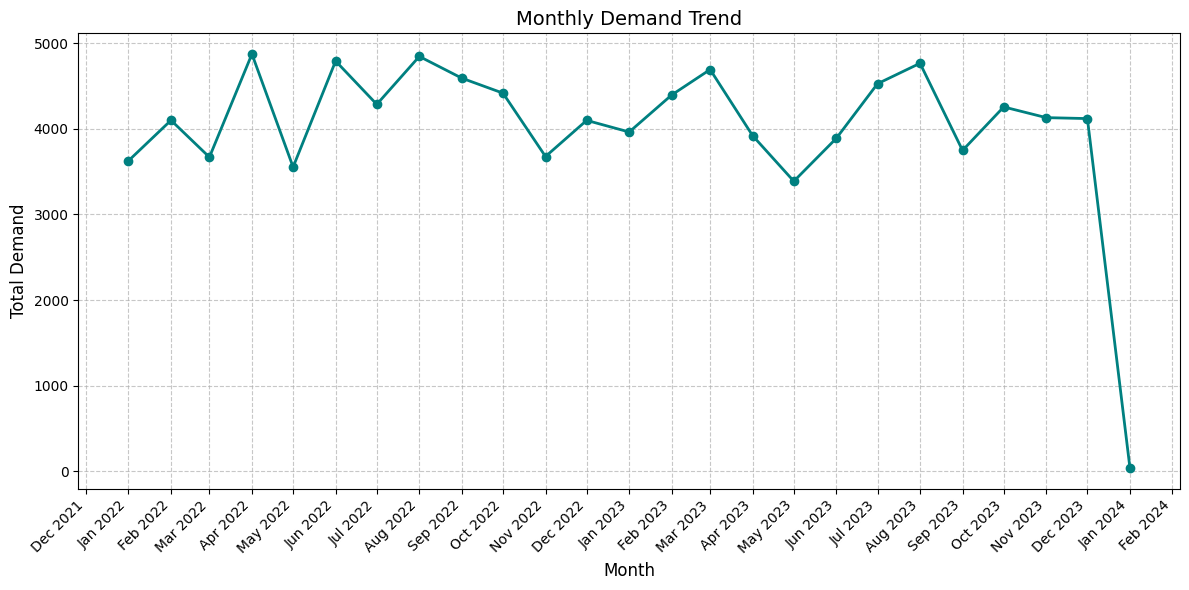

In [28]:
# Visualizing by months

monthly_demand = df.groupby(df['date'].dt.to_period('M'))['demand'].sum().reset_index()
monthly_demand['date'] = monthly_demand['date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
plt.plot(monthly_demand['date'], monthly_demand['demand'], marker='o', linewidth=2, color='teal')

# Formatting the x-axis to show all months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))   # every month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format as "Jan 2022", etc.
plt.xticks(rotation=45, ha='right')  # rotate for readability

plt.title('Monthly Demand Trend', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11524\436744449.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  quarterly_demand = df.groupby(pd.Grouper(key='date', freq='3M'))['demand'].sum().reset_index()


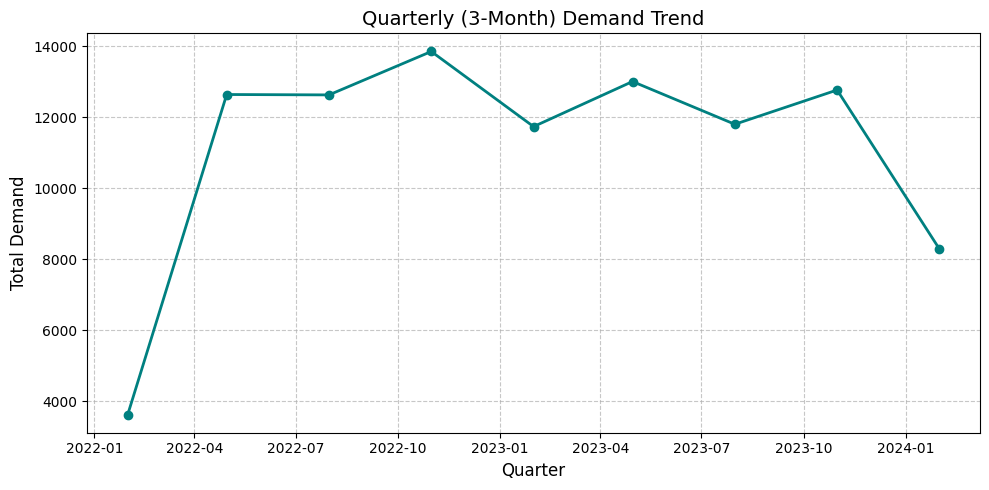

In [29]:
# Group data into 3-month (quarterly) intervals and sum demand
quarterly_demand = df.groupby(pd.Grouper(key='date', freq='3M'))['demand'].sum().reset_index()

# Plot the quarterly trend
plt.figure(figsize=(10,5))
plt.plot(quarterly_demand['date'], quarterly_demand['demand'], marker='o', linestyle='-', linewidth=2, color='teal')

plt.title('Quarterly (3-Month) Demand Trend', fontsize=14)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Feature Engineering